Python Path: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


C:\Users\Dell\AppData\Local\Temp\ipykernel_8528\1428391531.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8528\1428391531.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['alcohol'] = df['alcohol'].replac

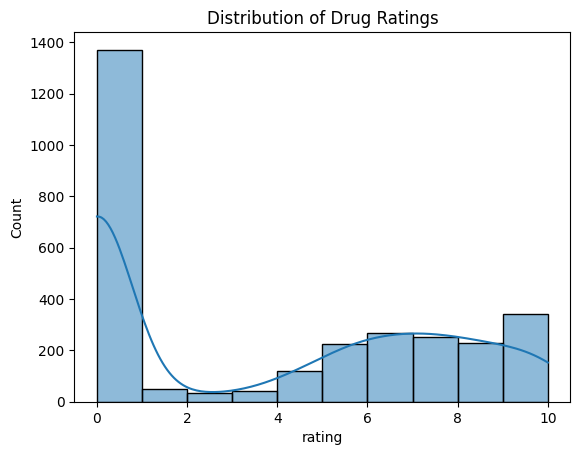

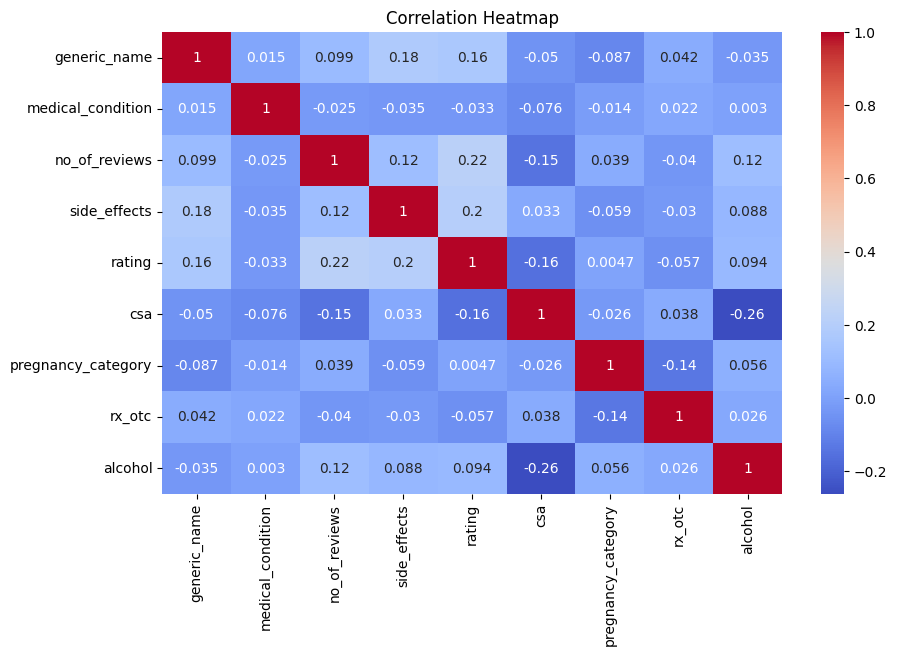

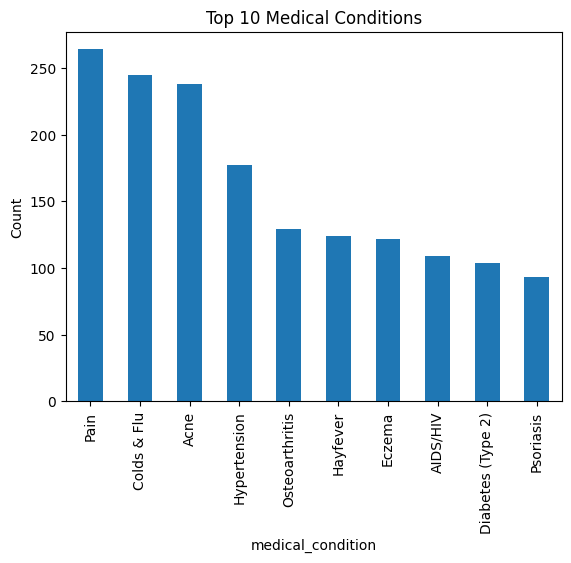

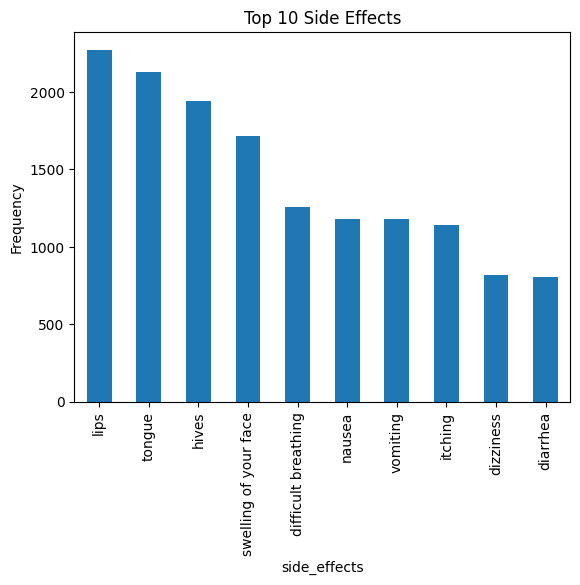

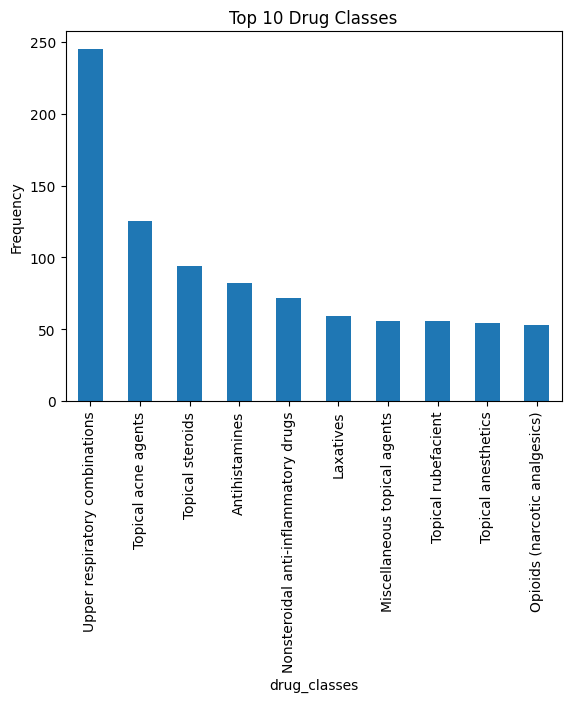

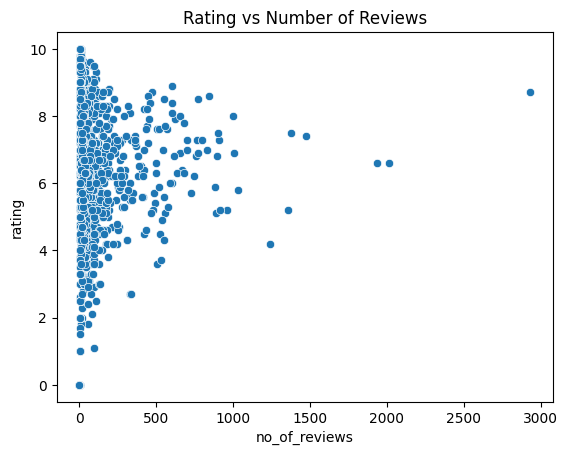

In [2]:

# Drugs, Side Effects & Medical Conditions - Exploratory Analysis
import sys
print("Python Path:", sys.executable)


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv("C:\\Users\\Dell\\Downloads\\drugs side effects\\drugs_side_effects_drugs_com.csv")

columns_fill_unknown = ['side_effects', 'related_drugs', 'generic_name', 'drug_classes', 'pregnancy_category', 'rx_otc']
for col in columns_fill_unknown:
    df[col].fillna("Unknown", inplace=True)

df['alcohol'] = df['alcohol'].replace({"X": 1, np.nan: 0})
df['rating'].fillna(0, inplace=True)
df['no_of_reviews'].fillna(0, inplace=True)
df.drop_duplicates(inplace=True)


le = LabelEncoder()
cols_to_encode = ['generic_name', 'medical_condition', 'side_effects', 'pregnancy_category', 'rx_otc', 'csa']
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])


numerical_cols = ['generic_name', 'medical_condition', 'no_of_reviews', 'side_effects', 
                  'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)


sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribution of Drug Ratings")
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


raw_df = pd.read_csv("C:\\Users\\Dell\\Downloads\\drugs side effects\\drugs_side_effects_drugs_com.csv")
raw_df['medical_condition'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Medical Conditions")
plt.ylabel("Count")
plt.show()


from collections import Counter
import re
def extract_effects(text):
    return [x.strip() for x in re.split(r';|,', str(text))]

side_effects = raw_df['side_effects'].dropna().apply(extract_effects).explode()
side_effects.value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Side Effects")
plt.ylabel("Frequency")
plt.show()


def extract_classes(text):
    return [x.strip() for x in str(text).split(',')]

drug_classes = raw_df['drug_classes'].dropna().apply(extract_classes).explode()
drug_classes.value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Drug Classes")
plt.ylabel("Frequency")
plt.show()


sns.scatterplot(data=df, x='no_of_reviews', y='rating')
plt.title("Rating vs Number of Reviews")
plt.show()

df.to_csv("cleaned_drugs_dataset.csv", index=False)



In [3]:

# Machine Learning Model - Predicting Drug Rating

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['generic_name', 'medical_condition', 'no_of_reviews', 'side_effects', 
        'csa', 'pregnancy_category', 'rx_otc', 'alcohol']]
y = df['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:\nMSE: {mse:.2f}\nR² Score: {r2:.2f}")


Random Forest Model Performance:
MSE: 2.06
R² Score: 0.86


In [4]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(rf, file)

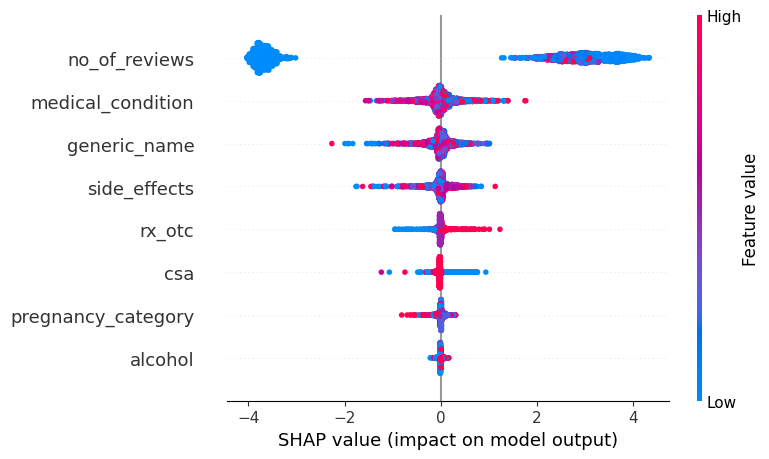

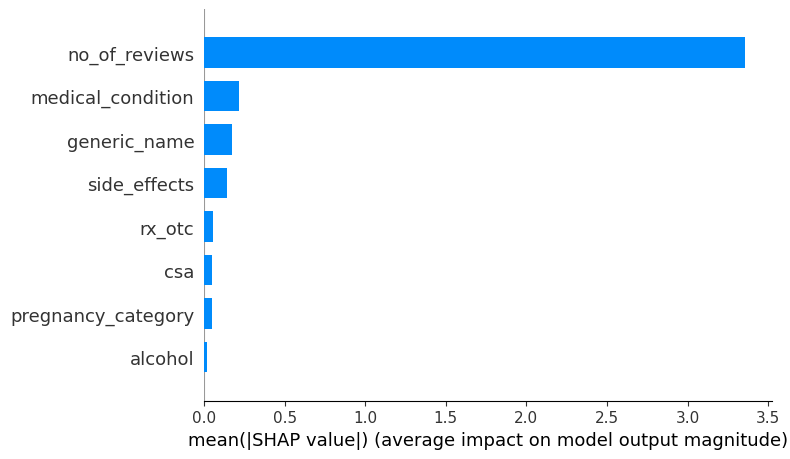

In [5]:
import shap
import matplotlib.pyplot as plt


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train, show=False)
plt.show()


shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.show()